<a href="https://colab.research.google.com/github/brandontan99/Self_Love_App/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
%cd /content
!git clone https://github.com/brandontan99/Self_Love_App.git
%cd /content/Self_Love_App

import sys 
sys.path.append("./preprocessing")
sys.path.append("./utils")
import pandas as pd
import matplotlib.pyplot as plt
import math

from data_cleaning import data_cleaning
from Data_Normalization import *

/content
Cloning into 'Self_Love_App'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (211/211), done.
remote: Total 243 (delta 137), reused 67 (delta 27), pack-reused 0
Receiving objects: 100% (243/243), 2.91 MiB | 9.77 MiB/s, done.
Resolving deltas: 100% (137/137), done.
/content/Self_Love_App


# Data Analysis

In [2]:
df = pd.read_csv("WID3006 ML Questionnaire.csv")
df_cleaned = data_cleaning(df)
df_encoded = data_encoding(df_cleaned)
df_hobbies = df_encoded.iloc[:, 64:]
new_df = pd.concat([df_cleaned, df_hobbies], axis =1)
new_df.drop(["What are your hobbies? (You may select more than 1)"], axis=1, inplace = True) 
new_df

,Timestamp,Gender:,What is your current occupation?,Do you enjoy socializing with large groups of people?,Do you enjoy challenges?,How creative of a person do you think you are?,How logical of a person do you think you are?,Would you prefer to engage your brain more than your body?,Are you a curious person?,Are you a perfectionist?,Are you a trusting person?,Do you have lot of patience?,Do you organize your schedule well?,Do you like to sit in front of a computer for long hours?,Do you enjoy making others happy?,Can you understand others' perspectives and feelings?,How confident are you in your own abilities?,What boosts your confidence ?,I prefer to spend my money on....,How do you organize your thoughts? Please pick whichever is closest.,Choose a pet which you prefer to keep.,What is your favorite time of the day?,Would you rather visit the future or the past?,What do you worry more about the most?,"When you retire, you'd like to live...",What is your favorite color?,What is your learning style? (Pick one that benefit you the most),Sports and Outdoors,Games,Spiritual and Mental,Performing Arts,Arts and Craft,Food and Drinks,Collecting,Rejuvenation
0,2021/04/20 12:08:21 PM GMT+8,Male,University student,2,3,4,4,4,4,4,4,4,4,5,4,3,3,When someone acknowledges you,The latest technology,Jotting it down on a scrap of paper,Fish,Night,Neither. I prefer the present,Your future,In a small town,Green,By attending online courses,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2021/04/21 5:18:20 PM GMT+8,Male,University student,4,4,4,4,3,5,5,3,4,4,4,5,4,5,When someone acknowledges you,Food,Any combination of these,Dog,Morning,Neither. I prefer the present,Your family and friends,Overseas,Green,By doing tutorial/lab questions,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2021/04/21 5:18:40 PM GMT+8,Male,University student,2,4,4,5,5,5,5,5,3,5,5,5,5,4,When someone acknowledges you,Home Improvements,I talk to myself out loud,Dog,Night,The future,Your future,Traveling the world,Blue,By reading an e-Book,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2021/04/21 5:23:38 PM GMT+8,Male,University student,4,4,3,4,3,4,4,4,4,4,4,4,4,4,When you accomplish a project,Activities with friends,Jotting it down on a scrap of paper,Dog,Night,Neither. I prefer the present,Your family and friends,Traveling the world,Blue,By attending online courses,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2021/04/21 5:25:01 PM GMT+8,Female,University student,1,2,5,4,5,5,5,5,5,5,5,5,5,5,By earning a lot of money,Home Improvements,I write it down in my calendar,I'm not a pet person,Morning,The future,Your family and friends,Exactly where I live now,Blue,By doing assignments,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2021/05/12 5:26:59 PM GMT+8,Male,University student,1,5,3,4,4,5,2,4,4,3,2,1,4,4,When someone acknowledges you,Home Improvements,Jotting it down on a scrap of paper,Dog,Night,The future,The state of the world,In a small town,White,By doing assignments,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
188,2021/05/12 5:35:35 PM GMT+8,Male,University student,3,2,3,4,3,4,2,3,4,4,5,4,4,4,By leading others to success,Activities with friends,I write it down in my calendar,Dog,Morning,The past,Your future,Traveling the world,Black,By attending lectures,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
189,2021/05/12 6:04:13 PM GMT+8,Male,University student,3,3,3,5,4,4,4,4,2,4,2,5,3,3,When someone acknowledges you,Food,I write it down in my calendar,Rabbit,Evening,Neither. I prefer the present,How others see me,Traveling the world,Black,By doing assignments,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
190,2021/05/12 6:22:07 PM GMT+8,Male,University student,5,5,2,5,2,4,5,3,1,3,4,5,3,4,When you accomplish a project,Activities with friends,I write it down in my calendar,Rabbit,Night,The past,Your future,Overseas,Blue,By doing tutorial/lab questions,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Hobbies (Targets)

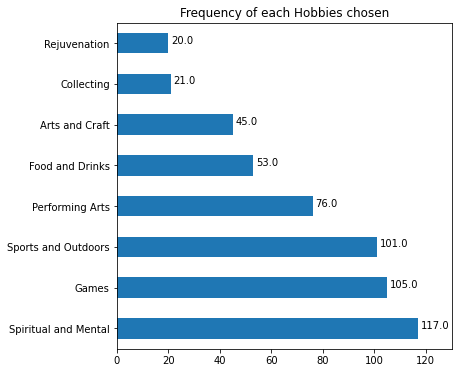

In [ ]:
# draw the distribution of the hobbies with a horizontal bar chart
distribution_of_hobbies = df_hobbies.sum().sort_values(ascending=False)
distribution_of_hobbies.plot(kind='barh', figsize=(6, 6), title="Frequency of each Hobbies chosen")
plt.xlim([0, 130]) # to increase the border size so that the text will not overlap with the border

# put the frequency text on the right of the bar chart
for i, frequency in enumerate(distribution_of_hobbies):
  plt.text(x=frequency+1 , y =i , s= frequency, fontdict=dict(fontsize=10))

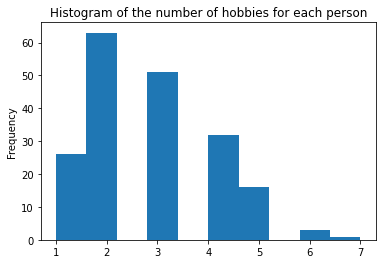

In [ ]:
df_hobbies.sum(axis=1).plot.hist(title='Histogram of the number of hobbies for each person')

# Bivariate Analysis (questions vs hobbies)

In [ ]:
def plot_graph(x_columns, y_columns, df, ncol):
  nrow = math.ceil(len(x_columns)/ncol)
  fig, axes = plt.subplots(nrow, ncol, squeeze=False, figsize=(8*ncol,6*nrow), constrained_layout = True)
  for i, x_column in enumerate(x_columns):
    temp_df = pd.DataFrame()
    for y_column in y_columns:
      temp_series = df[df[y_column]==1][x_column].value_counts()
      temp_series.name = y_column
      temp_df = temp_df.append(temp_series)
    r = math.floor(i / ncol)
    c = i % ncol 
    temp_df.plot.barh(title= f"{x_column} vs Hobbies", ax=axes[r,c])
    

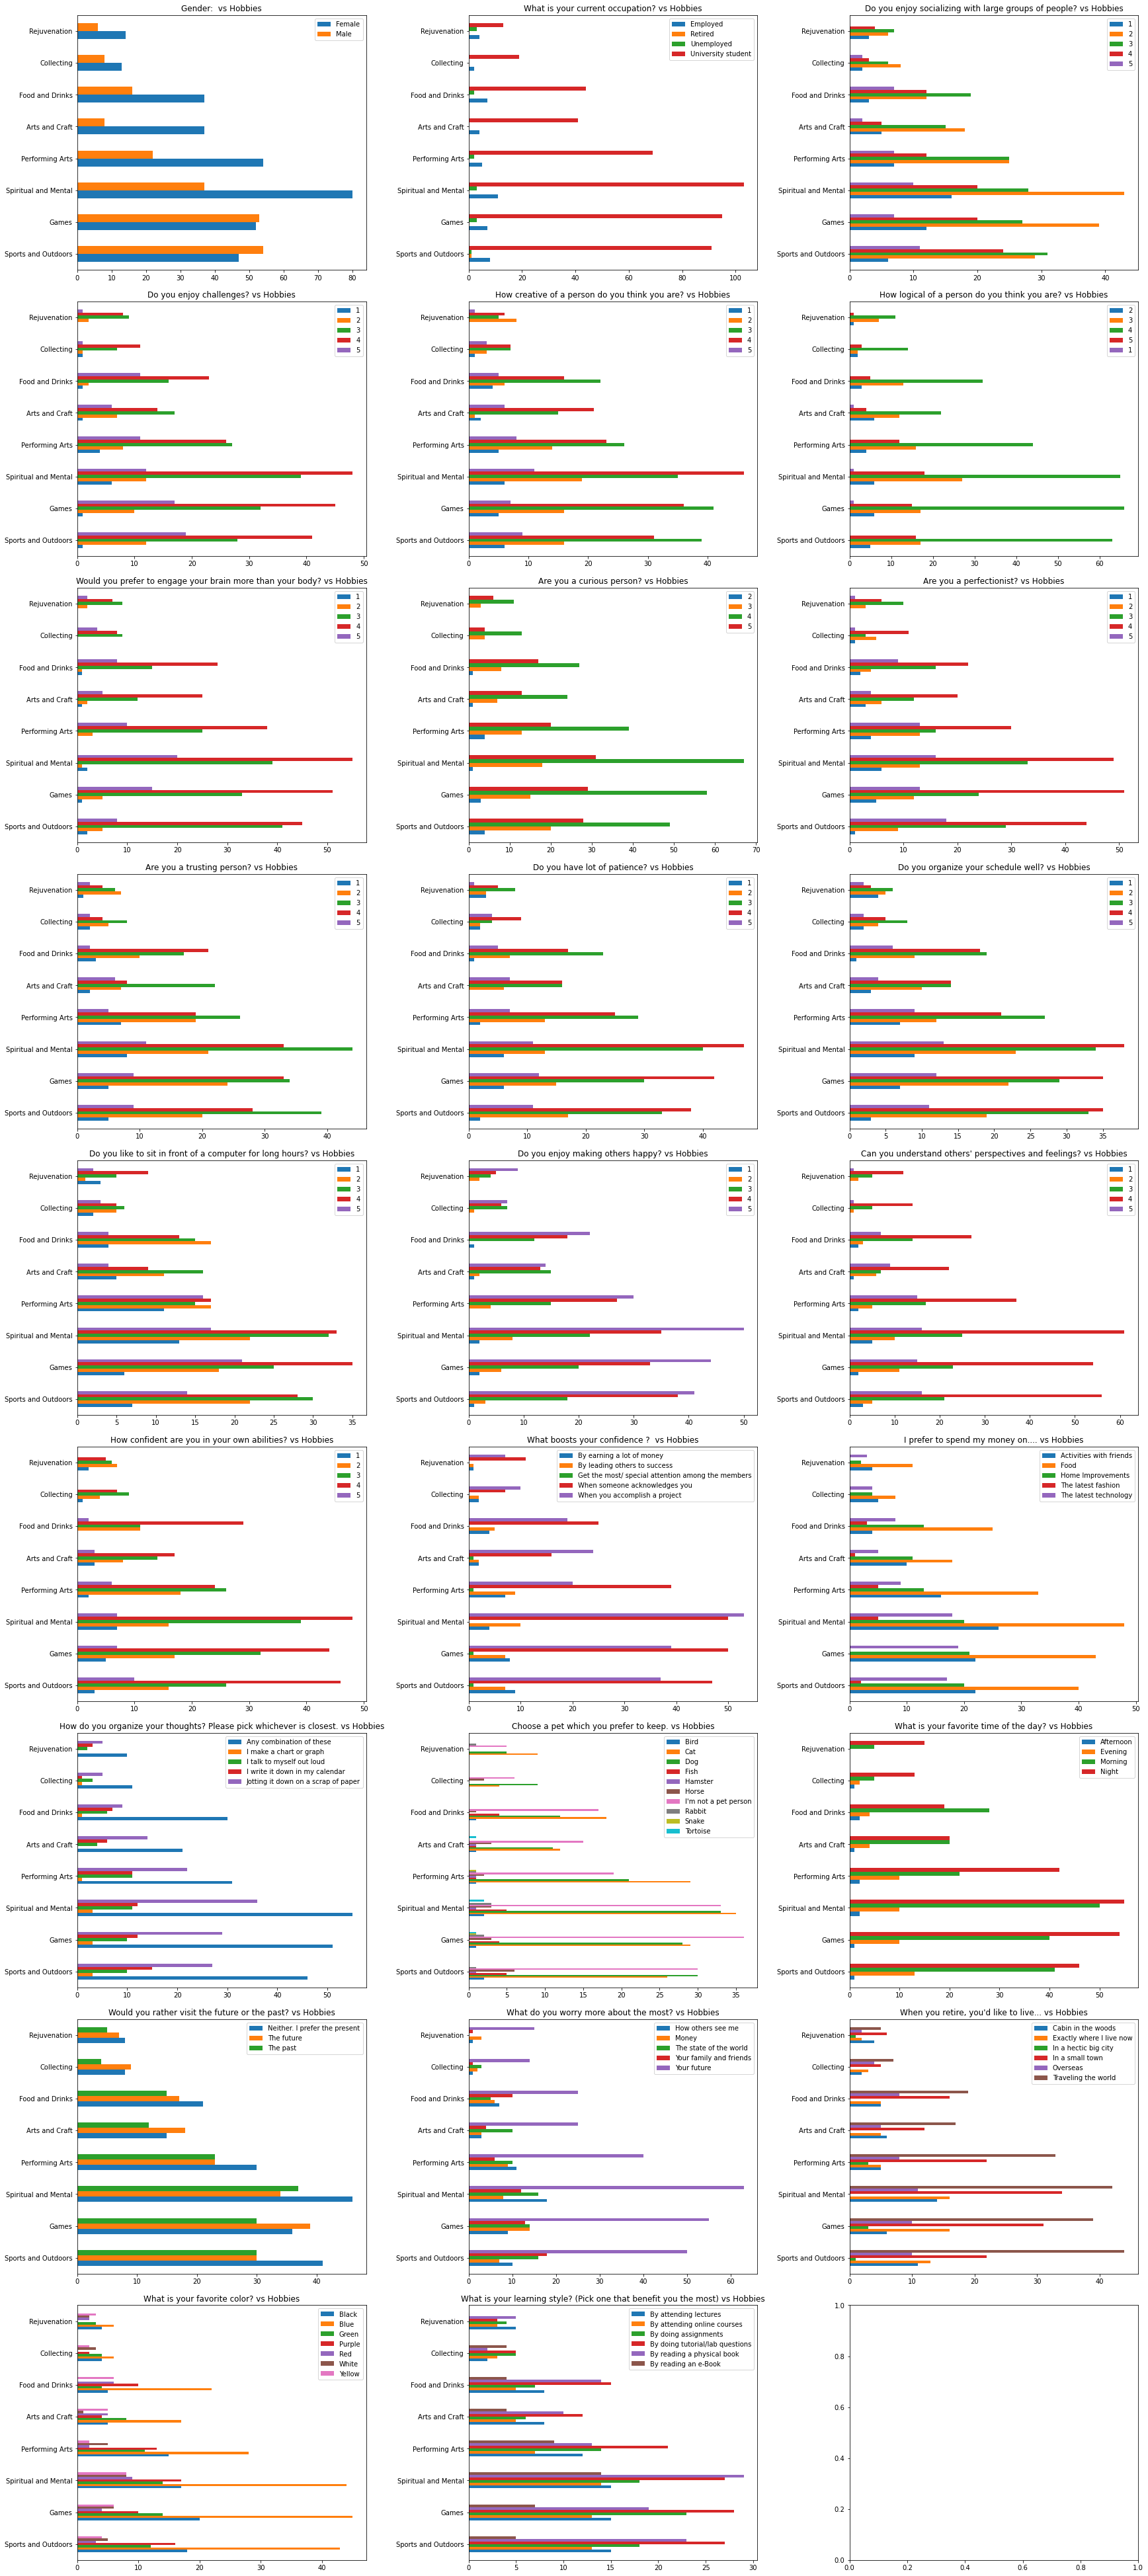

In [ ]:
plot_graph(new_df.columns[1:27], df_hobbies.columns, new_df, 3)